# BigQuery Dataframes 🎄 December 🎄 webinar

BigQuery DataFrames (Preview) provides a Pythonic DataFrame and machine learning (ML) API powered by the BigQuery engine.

* `bigframes.pandas` provides a pandas-compatible API for analytics.
* `bigframes.ml` provides a scikit-learn-like API for ML.

BigQuery DataFrames is an open-source package. You can run pip install --upgrade bigframes to install the latest version

[Github repo](https://github.com/googleapis/python-bigquery-dataframes)

## Exploring the difference between pandas vs BigQuery Dataframes

### pandas 🐼 world

In [124]:
import pandas as pd

Lets work with the `hacker_news` table, a table that contains a daily dump of information on [Hacker News](https://news.ycombinator.com/)

In [125]:
project_id = 'bigquery-public-data'
dataset_id = 'hacker_news'
table_id = 'full'
table_fqn = f'{project_id}.{dataset_id}.{table_id}'

Lets calculate a weighted average score for each user, where the weights are determined by the number of comments associated with each value.
The table has 33M rows, lets first work with a subset of that

In [126]:
# ~ 10% of rows 
max_rows = 3000000

In [6]:
import time
start = time.time()
df = pd.read_gbq(table_fqn, max_results=max_rows)
df['num_comments'] = df.groupby('by')['id'].count()
df['weighted_avg_score'] = (df['score'] * df['num_comments']).sum() / df['num_comments'].sum()
end = time.time()
pd_time = end - start

/var/tmp/ipykernel_70227/1073946146.py:5: RuntimeWarning: invalid value encountered in scalar divide
  df['weighted_avg_score'] = (df['score'] * df['num_comments']).sum() / df['num_comments'].sum()


In [104]:
print(f"It took: {pd_time} s")

It took: 411.91196966171265 s


In [127]:
df

title   url                                               text  dead  \
0        None  None  I would rather just have wired earbuds, period...  <NA>   
1        None  None                                               DNS?  <NA>   
2        None  None  These benchmarks seem pretty good.  Filterable...  <NA>   
3        None  None  Oh really?<p>* Excel alone uses 86.1MB of priv...  <NA>   
4        None  None  These systems are useless.  Of the many flaws:...  <NA>   
...       ...   ...                                                ...   ...   
2999995  None  None  Totally agree I think it is brilliant that Goo...  <NA>   
2999996  None  None  I'm glad I'm not the only one who noted that! ...  <NA>   
2999997  None  None  Mystery meet navigation! On Android, I acciden...  <NA>   
2999998  None  None  that&#x27;s just for writing c interfaces to k...  <NA>   
2999999  None  None  It&#x27;s British slang. That said, I&#x27;m B...  <NA>   

                    by  score        time                 timestamp     type  \
0                zeveb   <NA>  1591717736 2020-06-09 15:48:56+00:00  comment   
1                  nly   <NA>  1572810465 2019-11-03 19:47:45+00:00  comment   
2               mrkeen   <NA>  1591717727 2020-06-09 15:48:47+00:00  comment   
3           oceanswave   <NA>  1462987532 2016-05-11 17:25:32+00:00  comment   
4               nyxxie   <NA>  1572810473 2019-11-03 19:47:53+00:00  comment   
...                ...    ...         ...                       ...      ...   
2999995         rakkhi   <NA>  1287553645 2010-10-20 05:47:25+00:00  comment   
2999996       Timothee   <NA>  1287553674 2010-10-20 05:47:54+00:00  comment   
2999997    jimktrains2   <NA>  1539611870 2018-10-15 13:57:50+00:00  comment   
2999998        gohwell   <NA>  1539611865 2018-10-15 13:57:45+00:00  comment   
2999999  SmellyGeekBoy   <NA>  1539611861 2018-10-15 13:57:41+00:00  comment   

               id    parent  descendants  ranking  deleted  num_comments  \
0        23467666  23456782         <NA>     <NA>     <NA>           NaN   
1        21436112  21435130         <NA>     <NA>     <NA>           NaN   
2        23467665  23467426         <NA>     <NA>     <NA>           NaN   
3        11677248  11676886         <NA>     <NA>     <NA>           NaN   
4        21436113  21435025         <NA>     <NA>     <NA>           NaN   
...           ...       ...          ...      ...      ...           ...   
2999995   1810180   1809714         <NA>     <NA>     <NA>           NaN   
2999996   1810181   1809969         <NA>     <NA>     <NA>           NaN   
2999997  18219662  18219519         <NA>     <NA>     <NA>           NaN   
2999998  18219661  18218402         <NA>     <NA>     <NA>           NaN   
2999999  18219660  18219263         <NA>     <NA>     <NA>           NaN   

         weighted_avg_score  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
2999995                 NaN  
2999996                 NaN  
2999997                 NaN  
2999998                 NaN  
2999999                 NaN  

[3000000 rows x 16 columns]

In [129]:
df.memory_usage().sum() / 1024 / 1024

349.044921875

Lets crunch the whole table now (33M rows)

*SPOILER: Kernel dies with a OOM*

In [ ]:
%%time
#No max results setup
df = pd.read_gbq(table_fqn)
df['num_comments'] = df.groupby('by')['id'].count()
df['weighted_avg_score'] = (df['score'] * df['num_comments']).sum() / df['num_comments'].sum()
df

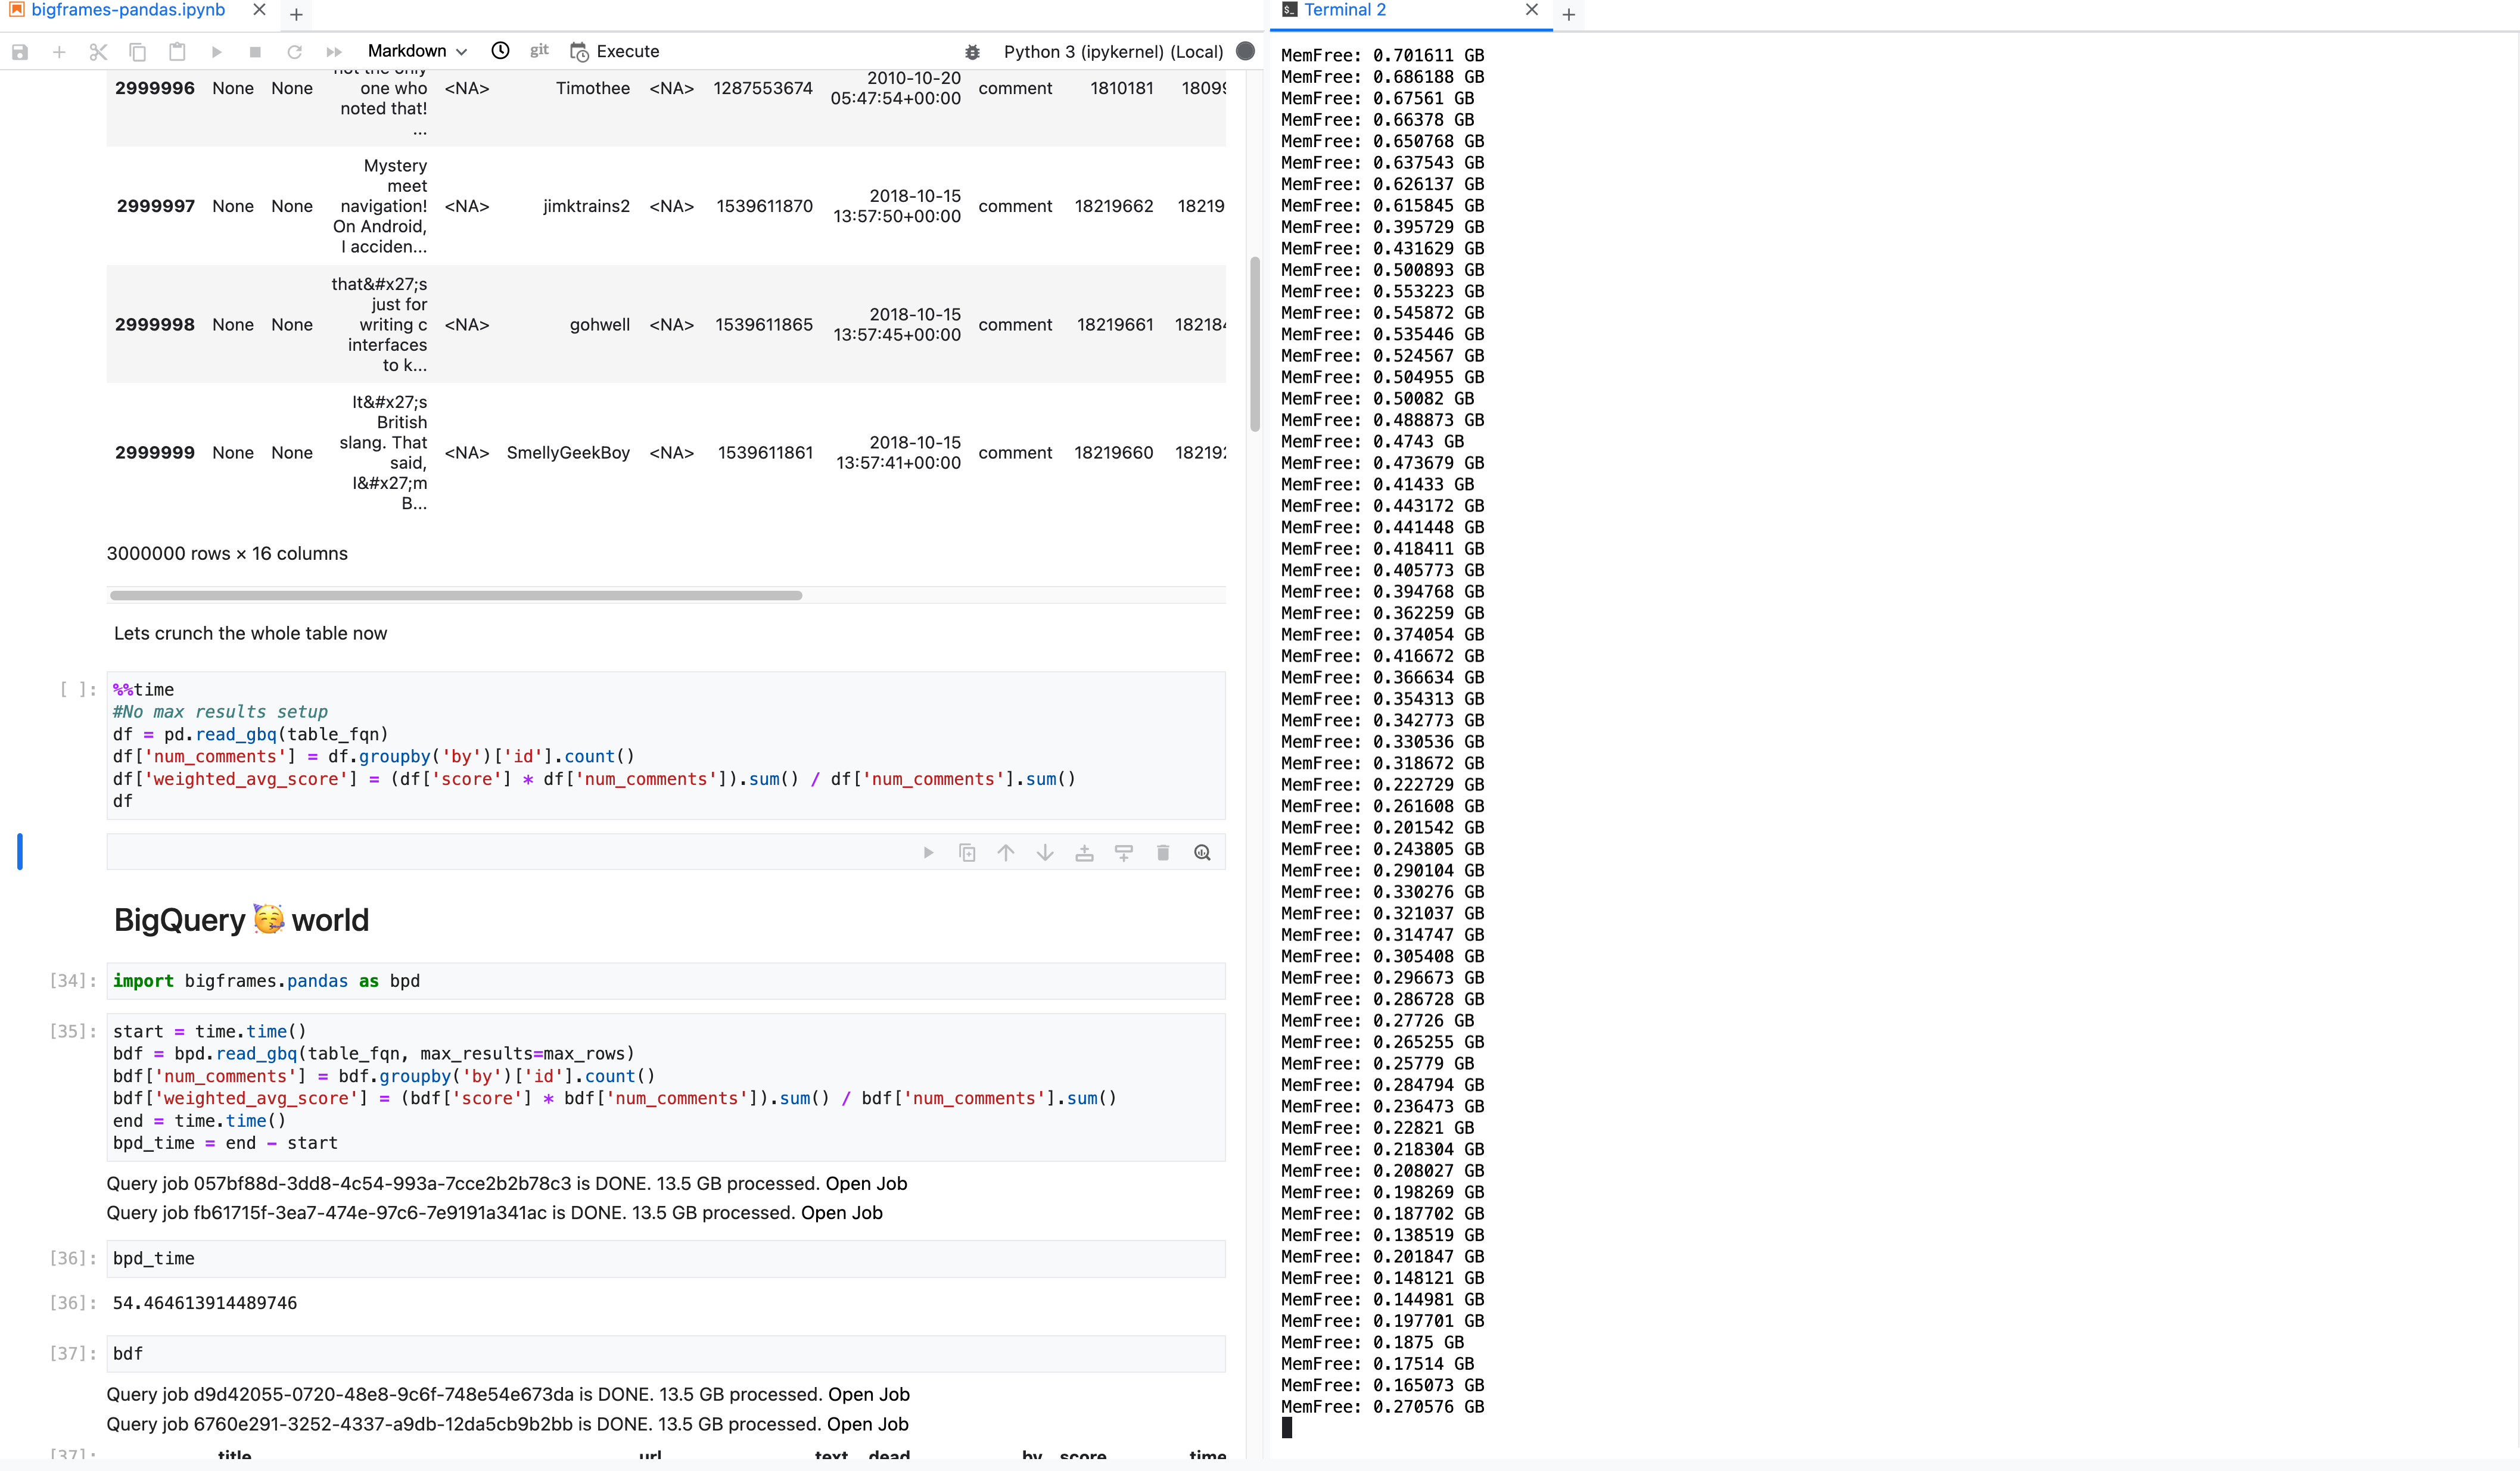

### BigQuery 🥳 world

In [130]:
import bigframes.pandas as bpd

In [131]:
import time
start = time.time()
bdf = bpd.read_gbq(table_fqn, max_results=max_rows)
bdf['num_comments'] = bdf.groupby('by')['id'].count()
bdf['weighted_avg_score'] = (bdf['score'] * bdf['num_comments']).sum() / bdf['num_comments'].sum()
end = time.time()
bpd_time = end - start

In [132]:
print(f"It took: {bpd_time} s")

It took: 67.56598711013794 s


In [99]:
bdf

title  \
0                                                <NA>   
1                                                <NA>   
2                                                <NA>   
3                                                <NA>   
4                                                <NA>   
5   The Impending NY Tech Apocalypse: Here's What ...   
6                                                <NA>   
7   Eureca beta is live. A place for your business...   
8                                                <NA>   
9                                                <NA>   
10                                               <NA>   
11                                               <NA>   
12                                               <NA>   
13                                               <NA>   
14                                               <NA>   
15                                               <NA>   
16                                               <NA>   
17  Oh dear: new Yahoo anti-spoofing measures brea...   
18             How Much Warmer Was Your City in 2016?   
19                                               <NA>   
20                       Working Best at Coffee Shops   
21                                               <NA>   
22                                               <NA>   
23                                               <NA>   
24                                               <NA>   

                                                  url  \
0                                                <NA>   
1                                                <NA>   
2                                                <NA>   
3                                                <NA>   
4                                                <NA>   
5   http://www.businessinsider.com/future-new-york...   
6                                                <NA>   
7           https://www.eureca.com/SalesDistribution/   
8                                                <NA>   
9                                                <NA>   
10                                               <NA>   
11                                               <NA>   
12                                               <NA>   
13                                               <NA>   
14                                               <NA>   
15                                               <NA>   
16                                               <NA>   
17  http://www.itworld.com/security/413581/yahoo-e...   
18  https://www.nytimes.com/interactive/2017/01/18...   
19                                               <NA>   
20  http://www.theatlantic.com/business/archive/20...   
21                                               <NA>   
22                                               <NA>   
23                                               <NA>   
24                                               <NA>   

                                                 text  dead              by  \
0   Well, most people aren&#x27;t alcoholics, so I...  <NA>       slipframe   
1    Yup they are dangerous. Be careful Donald Trump.  <NA>           Sven7   
2   Sure, it&#x27;s totally reasonable. Just point...  <NA>       nicoburns   
3   <p><pre><code>    -       if (get_compat_times...  <NA>            lelf   
4   I wonder how long before special forces start ...  True   autisticcurio   
5                                                <NA>  <NA>         gaoprea   
6   Where would you relocate to? I'm assuming that...  <NA>    pavel_lishin   
7                                                <NA>  <NA>        ricardos   
8   I remember watching the American news media go...  <NA>         fareesh   
9   This article is incorrectly using the current ...  <NA>       stale2002   
10  In the firm I made my internship, we have to u...  <NA>    iserlohnmage   
11  The main reason it requires unsafe is for memo...  <NA>           comex   
12     you have to auth again when you use apple pay.  

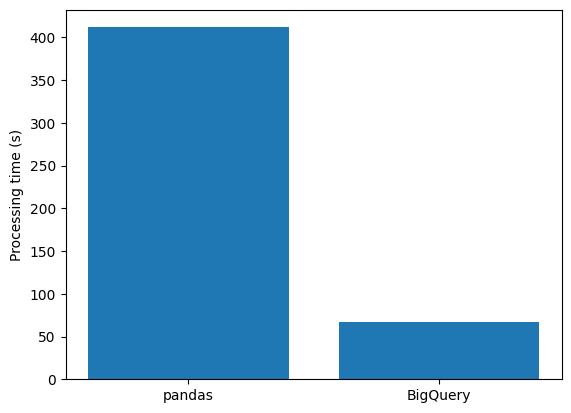

In [133]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

engine = ['pandas', 'BigQuery']
time = [pd_time, bpd_time]
ax.bar(engine, time)
ax.set_ylabel('Processing time (s)')
plt.show()

Lets work with the full table (33M records)

In [134]:
%%time
#No max results setup
bdf = bpd.read_gbq(table_fqn)
bdf['num_comments'] = bdf.groupby('by')['id'].count()
bdf['weighted_avg_score'] = (bdf['score'] * bdf['num_comments']).sum() / bdf['num_comments'].sum()
bdf

CPU times: user 612 ms, sys: 44.1 ms, total: 656 ms
Wall time: 53 s


title  \
0                                                <NA>   
1                                                <NA>   
2                                                <NA>   
3                                                <NA>   
4                                                <NA>   
5   The Impending NY Tech Apocalypse: Here's What ...   
6                                                <NA>   
7   Eureca beta is live. A place for your business...   
8                                                <NA>   
9                                                <NA>   
10                                               <NA>   
11                                               <NA>   
12                                               <NA>   
13                                               <NA>   
14                                               <NA>   
15                                               <NA>   
16                                               <NA>   
17  Oh dear: new Yahoo anti-spoofing measures brea...   
18             How Much Warmer Was Your City in 2016?   
19                                               <NA>   
20                       Working Best at Coffee Shops   
21                                               <NA>   
22                                               <NA>   
23                                               <NA>   
24                                               <NA>   

                                                  url  \
0                                                <NA>   
1                                                <NA>   
2                                                <NA>   
3                                                <NA>   
4                                                <NA>   
5   http://www.businessinsider.com/future-new-york...   
6                                                <NA>   
7           https://www.eureca.com/SalesDistribution/   
8                                                <NA>   
9                                                <NA>   
10                                               <NA>   
11                                               <NA>   
12                                               <NA>   
13                                               <NA>   
14                                               <NA>   
15                                               <NA>   
16                                               <NA>   
17  http://www.itworld.com/security/413581/yahoo-e...   
18  https://www.nytimes.com/interactive/2017/01/18...   
19                                               <NA>   
20  http://www.theatlantic.com/business/archive/20...   
21                                               <NA>   
22                                               <NA>   
23                                               <NA>   
24                                               <NA>   

                                                 text  dead              by  \
0   Well, most people aren&#x27;t alcoholics, so I...  <NA>       slipframe   
1    Yup they are dangerous. Be careful Donald Trump.  <NA>           Sven7   
2   Sure, it&#x27;s totally reasonable. Just point...  <NA>       nicoburns   
3   <p><pre><code>    -       if (get_compat_times...  <NA>            lelf   
4   I wonder how long before special forces start ...  True   autisticcurio   
5                                                <NA>  <NA>         gaoprea   
6   Where would you relocate to? I'm assuming that...  <NA>    pavel_lishin   
7                                                <NA>  <NA>        ricardos   
8   I remember watching the American news media go...  <NA>         fareesh   
9   This article is incorrectly using the current ...  <NA>       stale2002   
10  In the firm I made my internship, we have to u...  <NA>    iserlohnmage   
11  The main reason it requires unsafe is for memo...  <NA>           comex   
12     you have to auth again when you use apple pay.  

## A closer look to BigQuery 🎅 🎄 Dataframes capablities

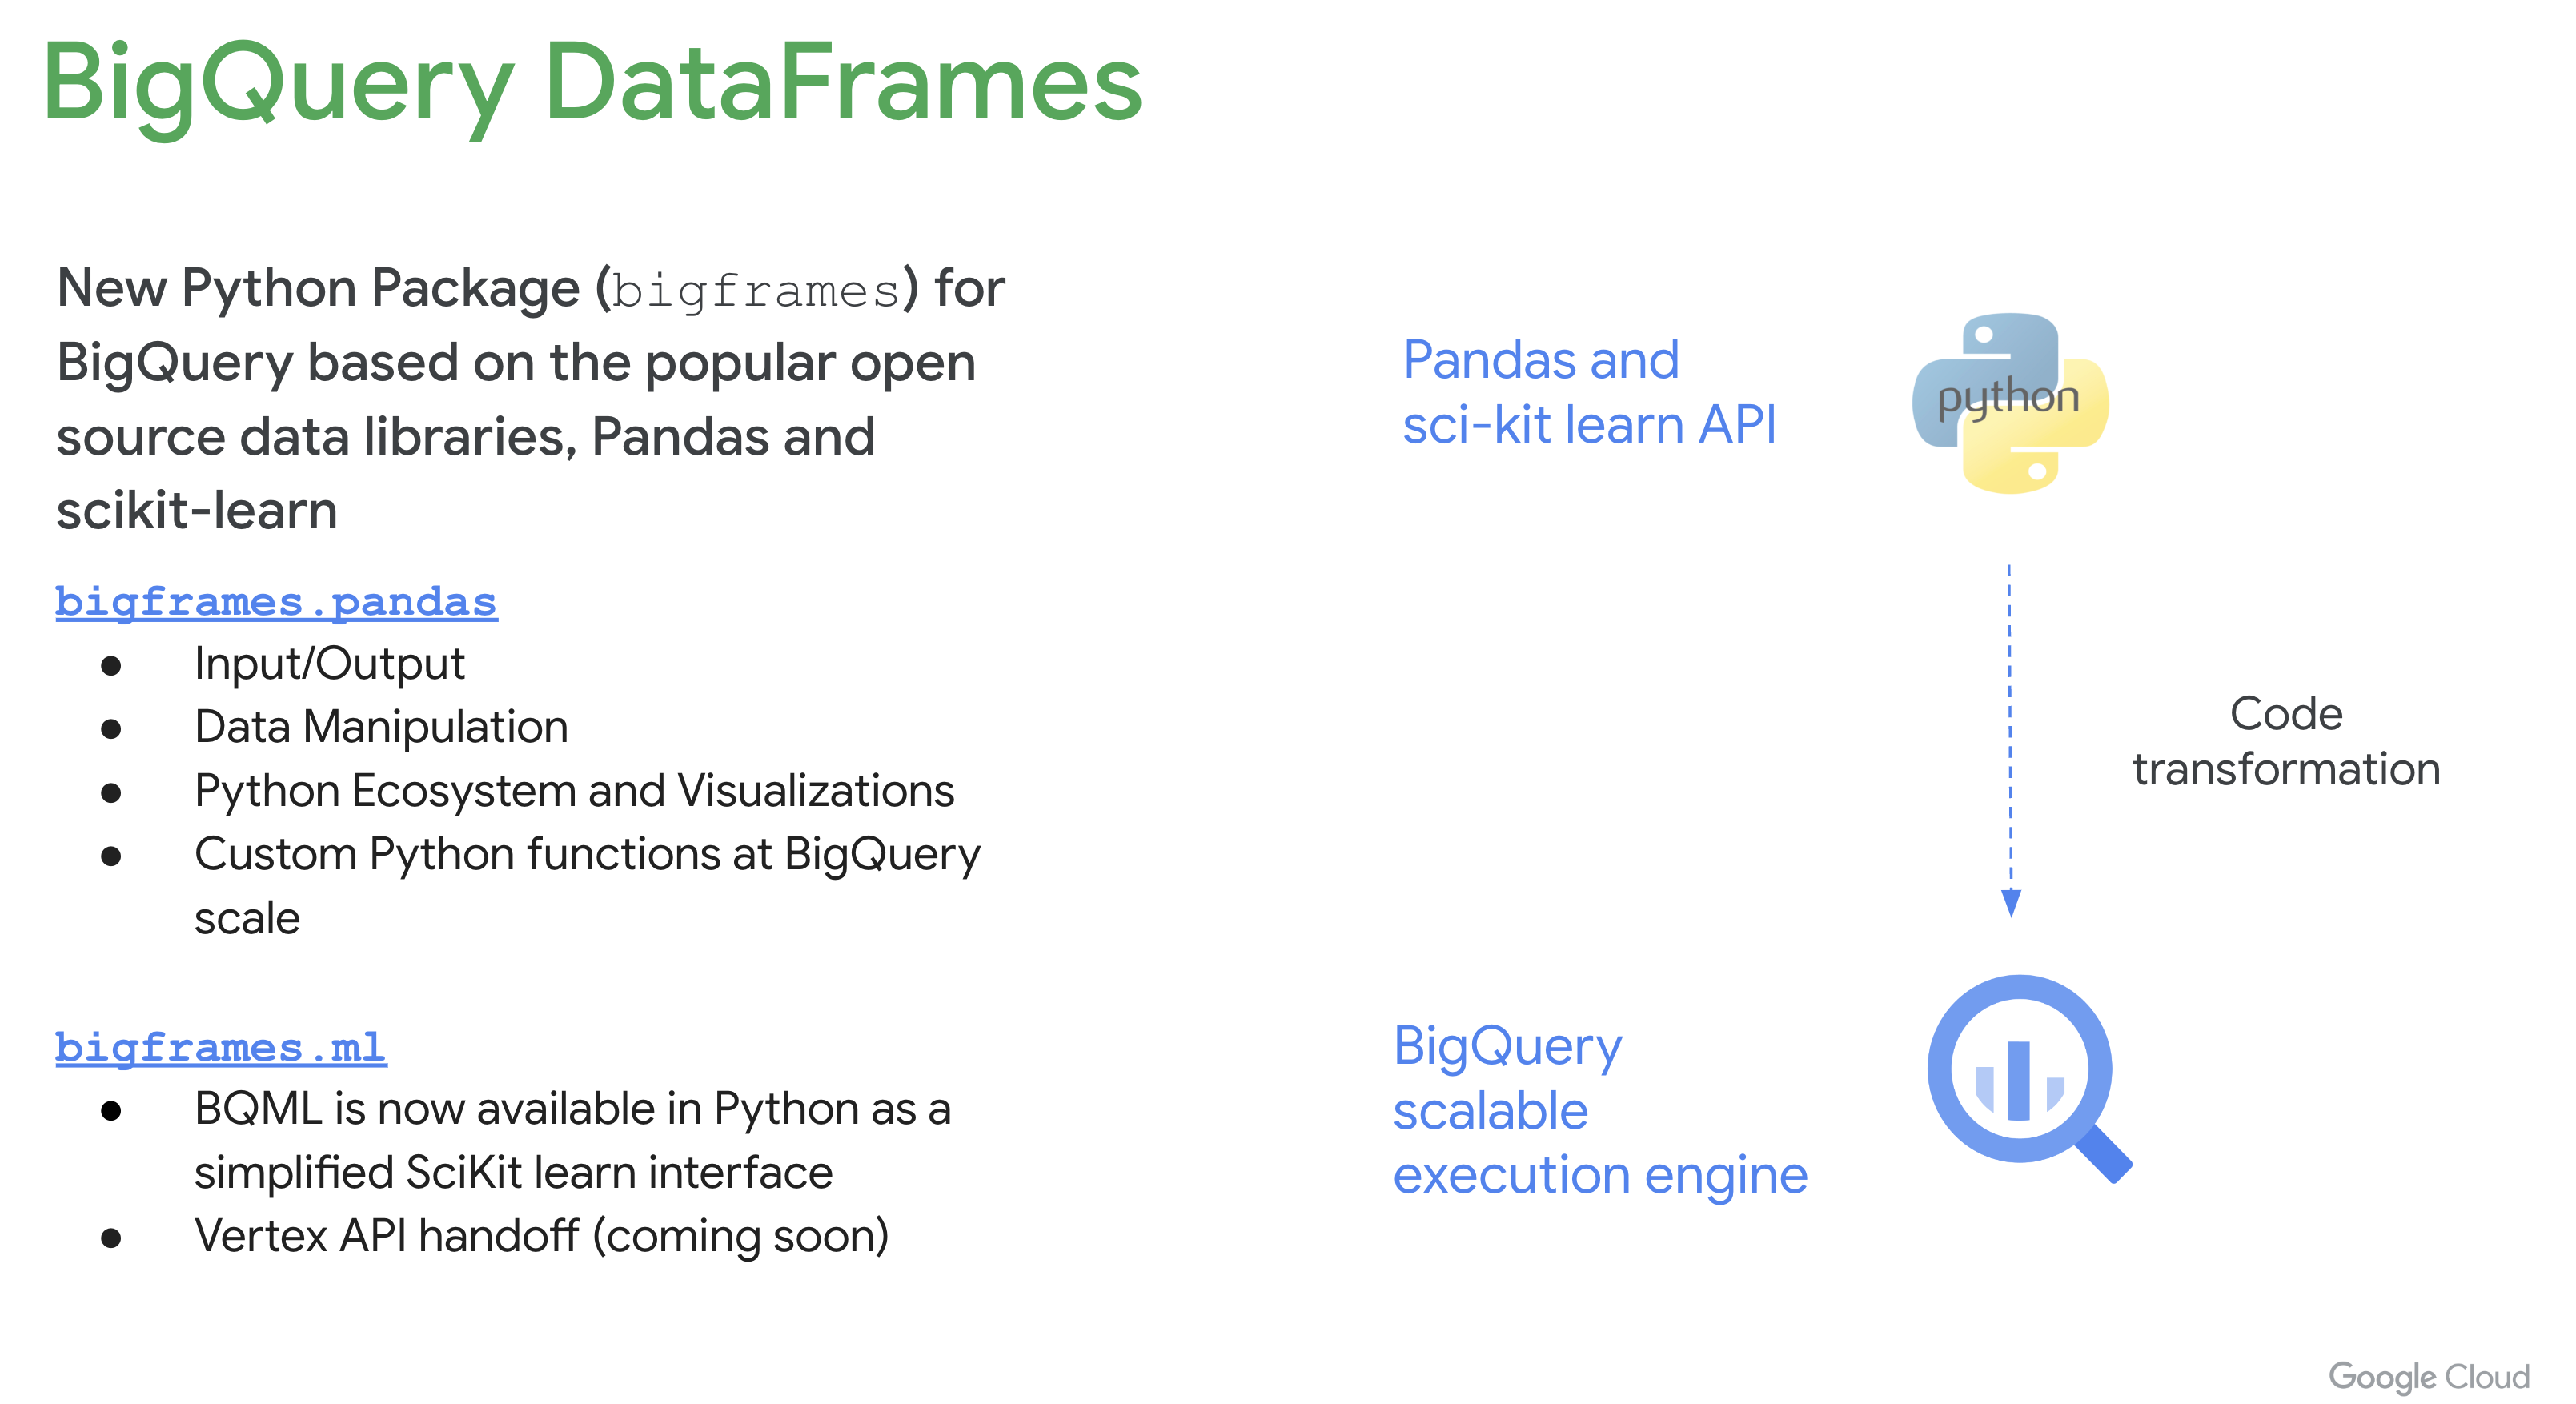

### pandas dataframe interface

Lets load a table with [Christmas movies data](https://www.kaggle.com/datasets/jonbown/christmas-movies) from Kaggle

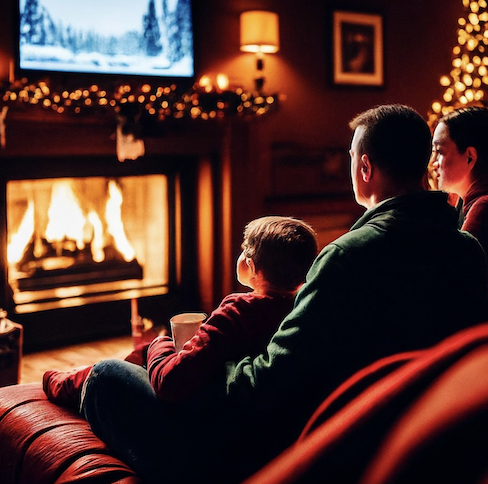

*Image generated with the brand new **Google-Imagen2** model*

In [135]:
import bigframes.pandas as bpd
project_id = 'velascoluis-dev-sandbox'
dataset_id = 'xmas_dataset'
table_id = 'xmas_movies_table'
table_fqn = f'{project_id}.{dataset_id}.{table_id}'
bdf = bpd.read_gbq(table_fqn)

In [136]:
bdf.head(5)

title    rating  runtime  imdb_rating  \
0  Kirk Cameron's Saving Christmas        PG       79          1.3   
1           A Fairly Odd Christmas  Approved       68          4.4   
2           Christmas with a Crown      <NA>       89          5.4   
3            How to Ruin Christmas     TV-MA       50          6.4   
4          Love, Lights, Hanukkah!      TV-G       84          6.8   

   meta_score                      genre  release_year  \
0          18             Comedy, Family          2014   
1        <NA>  Animation, Comedy, Family          2012   
2        <NA>                    Romance          2020   
3        <NA>              Comedy, Drama          2020   
4        <NA>             Drama, Romance          2020   

                                         description              director  \
0  His annual Christmas party faltering thanks to...          Darren Doane   
1  Timmy Turner been going overboard with his wis...  Savage Steve Holland   
2  When a successful woman returns to her hometow...          Dylan Pearce   
3  Prodigal daughter Tumi goes home for the holid...          Saint Seseli   
4  As Christina prepares her restaurant for its b...             Mark Jean   

                                               stars  votes   gross  \
0  Kirk Cameron, Darren Doane, Bridgette Cameron,...  16146  $2.78M   
1  Drake Bell, Daniella Monet, David James Lewis,...    934    <NA>   
2  Lisa Durupt, Marcus Rosner, Teryl Rothery, Mic...   1122    <NA>   
3   Nandi Nyembe, Busisiwe Lurayi, Thando Thabethe,     589    <NA>   
4  Mia Kirshner, Ben Savage, Marilu Henner, Advah...   1010    <NA>   

                                             img_src   type  
0  https://m.media-amazon.com/images/M/MV5BMTc3MT...  Movie  
1  https://m.media-amazon.com/images/M/MV5BMjMwOD...  Movie  
2  https://m.media-amazon.com/images/M/MV5BM2FmYj...  Movie  
3  https://m.media-amazon.com/images/M/MV5BNzdiNW...  Movie  
4  https://m.media-amazon.com/images/M/MV5BYzYxMz...  Movie  

[5 rows x 14 columns]

In [137]:
# Calculate average votes per genre
bdf.groupby('genre')['votes'].mean().sort_values(ascending=False)

genre
Action, Thriller                     882517.0
Action, Adventure, Sci-Fi            851729.0
Adventure, Comedy, Crime             363242.0
Action, Adventure, Comedy            183561.5
Animation, Action, Adventure         177997.0
Animation, Family, Fantasy      123584.666667
Action, Comedy, Crime                119053.0
Drama, Fantasy, Romance          85188.833333
Adventure, Comedy                     70631.0
Animation, Adventure, Comedy     54237.666667
Adventure, Comedy, Family        50387.916667
Adventure, Comedy, Drama         43892.333333
Horror, Mystery, Thriller             42949.0
Comedy, Crime, Drama                  40191.8
Drama, Family, Fantasy           31039.736842
Comedy, Family                   28658.961538
Animation, Comedy, Family             28545.4
Comedy, Family, Fantasy          24165.941176
Comedy, Drama, Fantasy                21390.4
Animation, Comedy, Drama              21192.0
Comedy, Crime, Mystery                20849.5
Family, Fantasy, Musical    

<Axes: xlabel='release_year'>

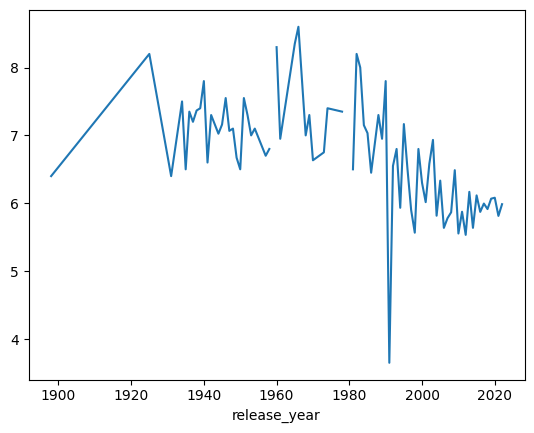

In [138]:
# Group by release year and calculate average imdb_rating
bdf.groupby('release_year')['imdb_rating'].mean().to_pandas().plot(kind='line')

In [139]:
# Top 10 movies with highest imdb_rating and more than 1000 votes
bdf[bdf['votes'] > 1000].sort_values(by='imdb_rating', ascending=False).head(10)

title     rating  runtime  \
681  It's Always Sunny in Philadelphia: A Very Sunn...      TV-MA       43   
535                              It's a Wonderful Life         PG      130   
157                               Anne of Green Gables       TV-G      199   
220                     Christmas Eve on Sesame Street       TV-Y       60   
164                    How the Grinch Stole Christmas!  Not Rated       26   
416                          A Charlie Brown Christmas       TV-G       25   
662                                      The Apartment   Approved      125   
19                                       The Gold Rush     Passed       95   
590                                           Die Hard          R      132   
763                                        The Snowman          G       26   

     imdb_rating  meta_score                       genre  release_year  \
681          9.2        <NA>                      Comedy          2005   
535          8.6          89      Drama, Family, Fantasy          1946   
157          8.5        <NA>               Drama, Family          1985   
220          8.4        <NA>       Comedy, Family, Music          1978   
164          8.3        <NA>   Animation, Comedy, Family          1966   
416          8.3        <NA>    Animation, Comedy, Drama          1965   
662          8.3          94      Comedy, Drama, Romance          1960   
19           8.2        <NA>    Adventure, Comedy, Drama          1925   
590          8.2          72            Action, Thriller          1988   
763          8.2        <NA>  Animation, Family, Fantasy          1982   

                                           description           director  \
681  Dennis and Dee decide to teach Frank a lesson ...        Fred Savage   
535  An angel is sent from Heaven to help a despera...        Frank Capra   
157  An orphan girl, sent to an elderly brother and...      Megan Follows   
220  Big Bird worries when Oscar tells him that if ...          Jon Stone   
164  A grumpy hermit hatches a plan to steal Christ...        Chuck Jones   
416  Depressed at the commercialism he sees around ...      Bill Melendez   
662  A Manhattan insurance clerk tries to rise in h...       Billy Wilder   
19   A prospector goes to the Klondike during the 1...    Charles Chaplin   
590  A New York City police officer tries to save h...     John McTiernan   
763  On Christmas Eve, a young boy builds a snowman...  Jimmy T. Murakami   

                                                 stars   votes    gross  \
681  Charlie Day, Glenn Howerton, Rob McElhenney, K...    4606     <NA>   
535  James Stewart, Donna Reed, Lionel Barrymore, T...  461671     <NA>   
157  Colleen Dewhurst, Richard Farnsworth, Patricia...   21263     <NA>   
220  Jim Henson, Frank Oz, Jerry Nelson, Richard Hu...    1019     <NA>   
164  Ben Washam, Boris Karloff, Thurl Ravenscroft, ...   53717     <NA>   
416  Ann Altieri, Chris Doran, Sally Dryer, Bill Me...   39696     <NA>   
662  Jack Lemmon, Shirley MacLaine, Fred MacMurray,...  182942  $18.60M   
19   Charles Chaplin, Mack Swain, Tom Murray, Henry...  112326   $5.45M   
590  Bruce Willis, Alan Rickman, Bonnie Bedelia, Re...  882517  $83.01M   
763  Dianne Jackson, Peter Auty, David Bowie, Raymo...   15391     <NA>   

                                               img_src        type  
681  https://m.media-amazon.com/images/M/MV5BNDI5ZT...  TV Episode  
535  https://m.media-amazon.com/images/M/MV5BZjc4ND...       Movie  
157  https://m.media-amazon.com/images/M/MV5BNjBmYj...       Movie  
220  https://m.media-amazon.com/images/M/MV5BMTkxNz...       Movie  
164  https://m.media-amazon.com/images/M/MV5BNzBiMj...       Movie  
416  https://m.media-amazon.com/images/M/MV5BMzQ3M2...       Movie  
662  https://m.media-amazon.com/images/M/MV5BNzkwOD...       Movie  
19   https://m.media-amazon.com/images/M/MV5BZjEyOT...       Movie  
590  https://m.media-amazon.com/images/M/MV5BZjRlND...       Movie  
763  https:

In [77]:
@bpd.remote_function([str], bool, reuse=False)
def has_keywords(description):
    """
    Checks if a movie description contains certain keywords.
    """
    keywords = ['holiday', 'family', 'tradition']
    for keyword in keywords:
        if keyword in description.lower():
            return True
        return False

In [24]:
help(bpd.remote_function)

Help on function remote_function in module bigframes.pandas:

remote_function(input_types: 'List[type]', output_type: 'type', dataset: 'Optional[str]' = None, bigquery_connection: 'Optional[str]' = None, reuse: 'bool' = True, name: 'Optional[str]' = None, packages: 'Optional[Sequence[str]]' = None)
    Decorator to turn a user defined function into a BigQuery remote function. Check out
    the code samples at: https://cloud.google.com/bigquery/docs/remote-functions#bigquery-dataframes.
    
    .. note::
        Please make sure following is setup before using this API:
    
    1. Have the below APIs enabled for your project:
    
        * BigQuery Connection API
        * Cloud Functions API
        * Cloud Run API
        * Cloud Build API
        * Artifact Registry API
        * Cloud Resource Manager API
    
       This can be done from the cloud console (change `PROJECT_ID` to yours):
       https://console.cloud.google.com/apis/enableflow?apiid=bigqueryconnection.googleapis.c

In [140]:
bdf['has_holiday_keywords'] = bdf['description'].apply(has_keywords)
holiday_movies = bdf[bdf['has_holiday_keywords']]

In [141]:
holiday_movies['description']

0      His annual Christmas party faltering thanks to...
3      Prodigal daughter Tumi goes home for the holid...
5      A warm-hearted Christmas tale to remind us tha...
12     Brendan, a young man feels alone during the ho...
15     On Christmas Day, Georgia experiences the true...
18     Small-time con man Nick DeMarco is ordered by ...
20     Two college sweethearts reconnect while coordi...
30     After finishing a mission, aid worker Annie Bl...
55     Molly and Jared have sworn-off partaking in ho...
56     Fed up with being single on holidays, two stra...
81     When an accident puts her music dreams on hold...
84     Jamie (Jennie Garth), owner of a small-town si...
90     A Christmas-tree lot helps two people rediscov...
91     Miranda and Paul, two business rivals who play...
96     Lauren, a hard-working advertising executive, ...
104    Sadie returns home for Christmas after her boy...
107    When a country music star is accused of plagia...
112    After stepping down as C

### sci-kit learn interface

Powered by BQML

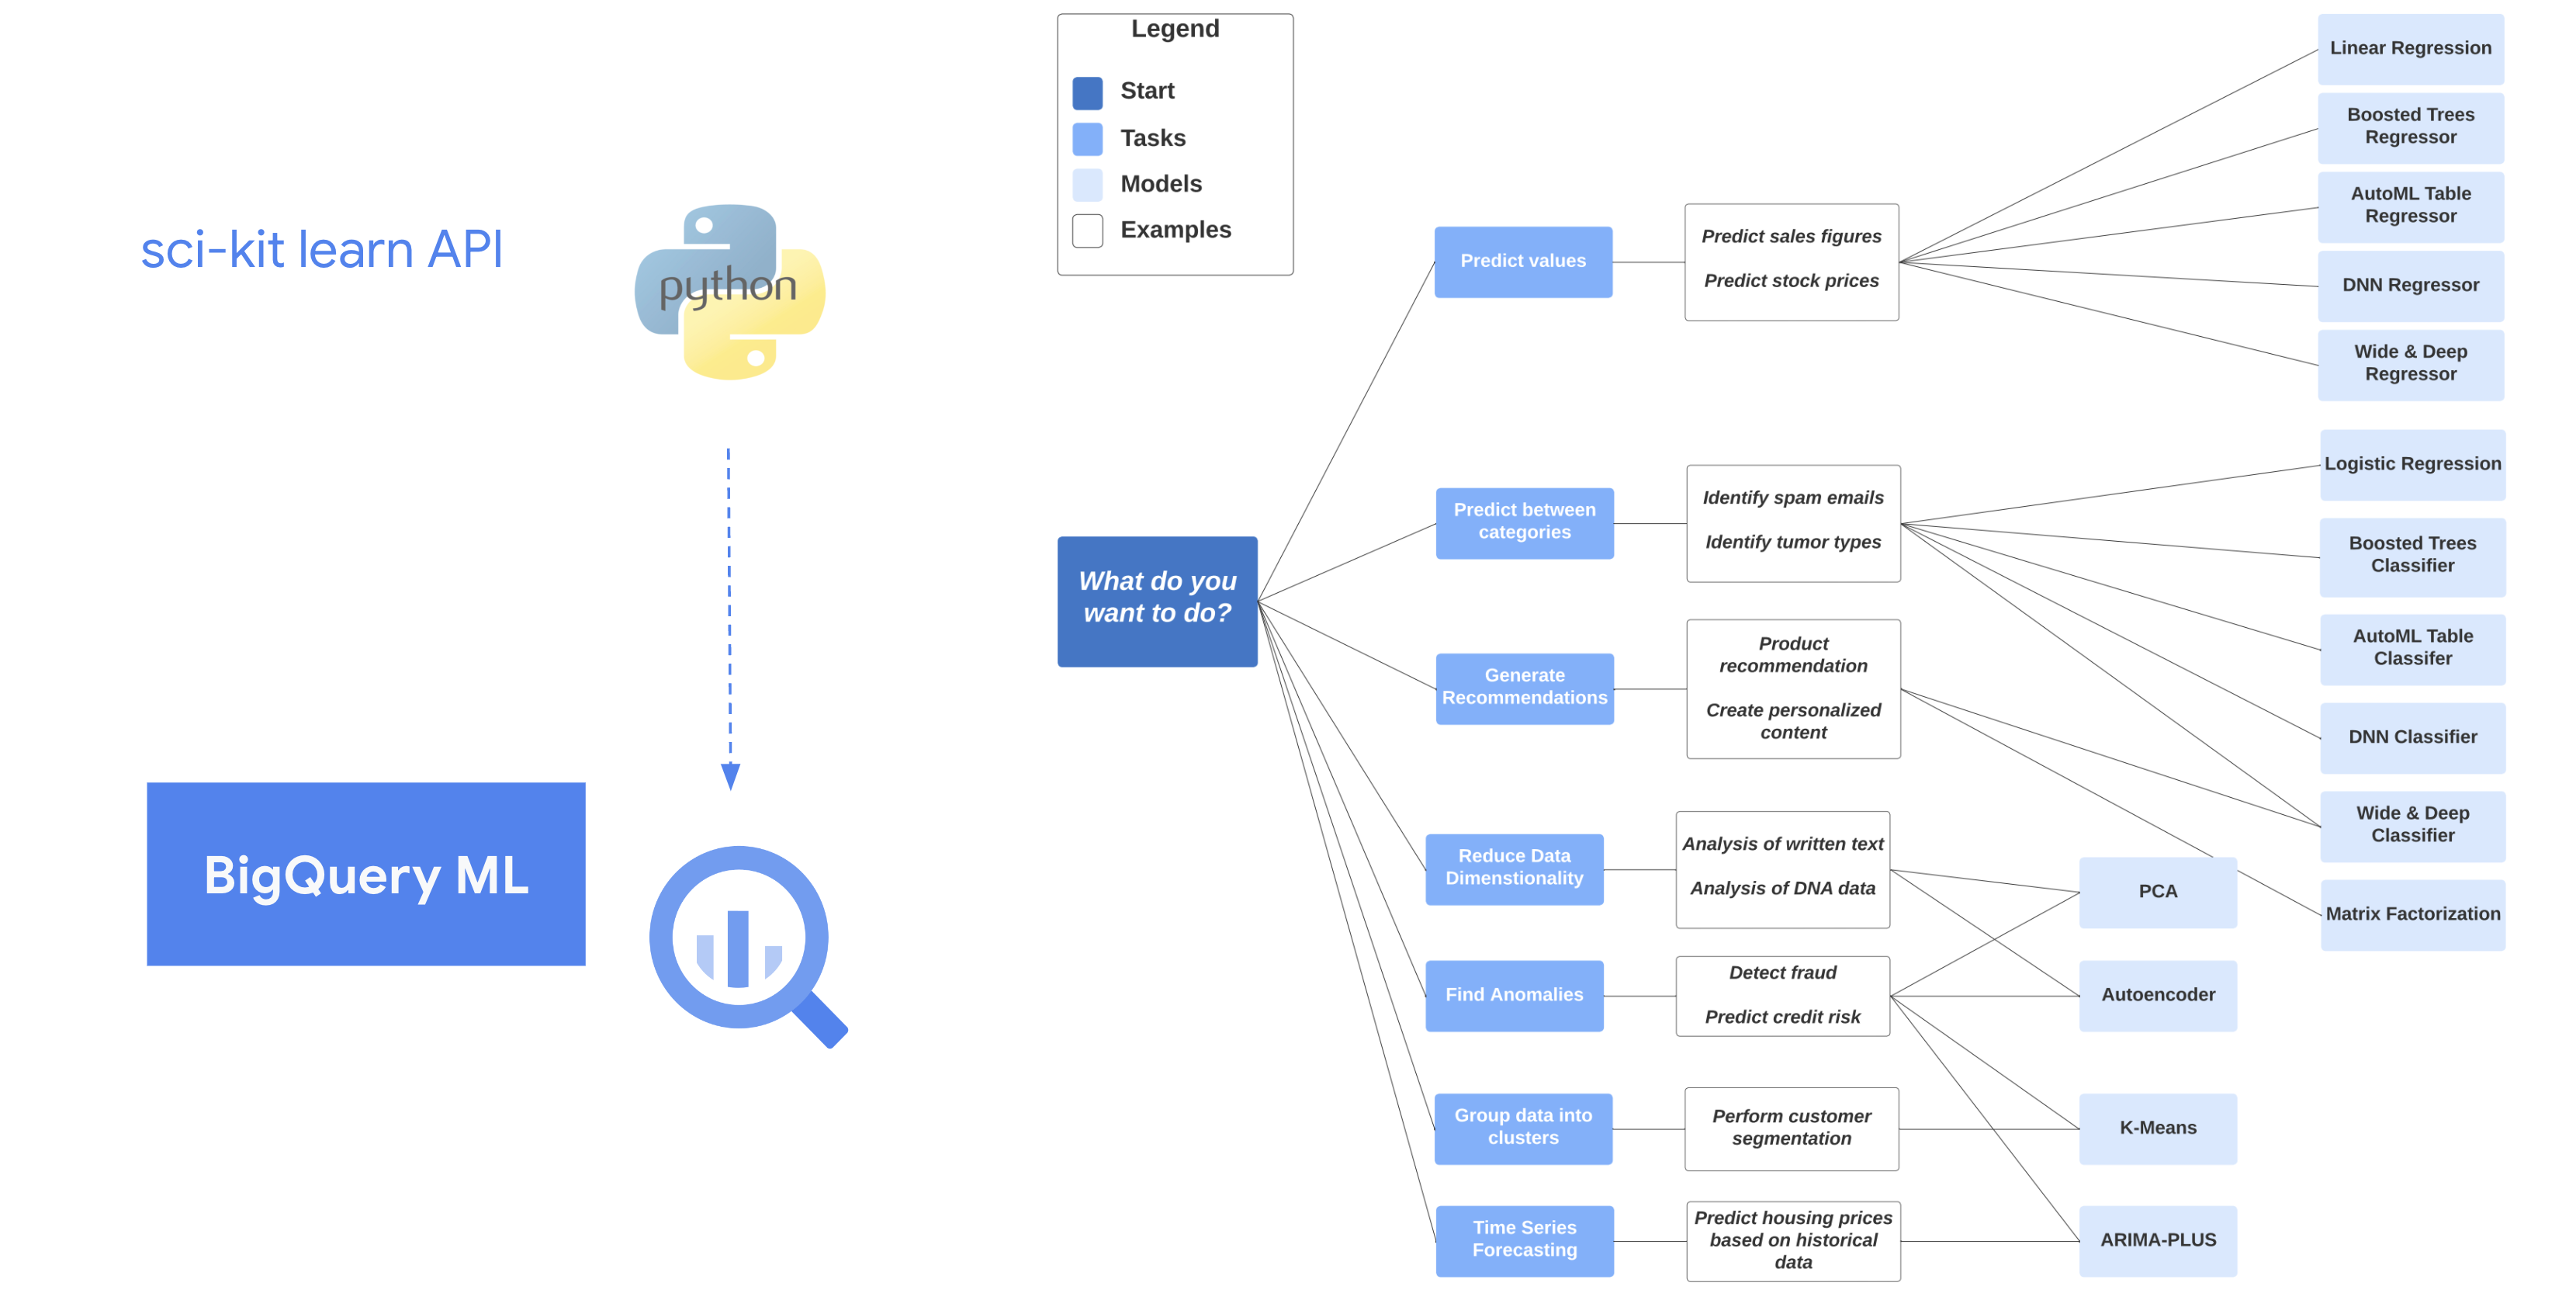

Lets build a regression to predict the imdb_rating based on the release year, director and movie runtime

In [ ]:
%%bigquery
CREATE OR REPLACE MODEL `bqml_tutorial.london_station_clusters`
  OPTIONS(model_type='kmeans', num_clusters=4) AS (SQL)

In [142]:
from bigframes.ml.model_selection import train_test_split
from bigframes.ml.linear_model import LinearRegression
from bigframes.ml.preprocessing import OneHotEncoder

In [143]:
bdf['release_year'] = bdf['release_year'].fillna(0)
bdf['director'] = bdf['director'].fillna('Unknown')
bdf['imdb_rating'] = bdf['imdb_rating'].fillna(0)

In [144]:
# One-hot encoding for categorical features
encoder = OneHotEncoder()
encoded_director = encoder.fit_transform(bdf[['director']])

In [145]:
# Combine encoded features with other numerical features
features = bpd.concat((encoded_director,bdf[['release_year', 'runtime']]), axis=1)
target = bdf['imdb_rating']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target,random_state=42)

In [146]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [147]:
y_pred[y_pred["predicted_imdb_rating"] > 0]

predicted_imdb_rating          onehotencoded_director  release_year  \
2                 5.798617  [{'index': 147, 'value': 1.0}]          2020   
17                6.595703  [{'index': 354, 'value': 1.0}]          2010   
24                6.501383  [{'index': 273, 'value': 1.0}]          2015   
31                     6.0  [{'index': 449, 'value': 1.0}]          2015   
56                4.971568  [{'index': 269, 'value': 1.0}]          2020   
57                5.669488  [{'index': 324, 'value': 1.0}]          2016   
66                6.070534   [{'index': 86, 'value': 1.0}]          2016   
73                5.525833  [{'index': 363, 'value': 1.0}]          2021   
78                6.721082   [{'index': 81, 'value': 1.0}]          2005   
85                6.606287  [{'index': 356, 'value': 1.0}]          2020   
93                6.751695  [{'index': 128, 'value': 1.0}]          2012   
98                 6.59366  [{'index': 159, 'value': 1.0}]          2018   
102                5.57496  [{'index': 214, 'value': 1.0}]          2019   
103               6.801012  [{'index': 291, 'value': 1.0}]          2017   
106               5.445869  [{'index': 363, 'value': 1.0}]          2018   
114               6.266667  [{'index': 131, 'value': 1.0}]          2018   
122               1.092329  [{'index': 500, 'value': 1.0}]          2004   
123               5.560897  [{'index': 214, 'value': 1.0}]          2019   
126               6.595649  [{'index': 132, 'value': 1.0}]          2021   
133               5.384213   [{'index': 96, 'value': 1.0}]          1984   
148               5.522327   [{'index': 64, 'value': 1.0}]          2020   
151               5.499806  [{'index': 284, 'value': 1.0}]          2018   
168               6.312681  [{'index': 102, 'value': 1.0}]          2015   
173                3.56334  [{'index': 428, 'value': 1.0}]          2010   
177               6.183729  [{'index': 190, 'value': 1.0}]          2022   

     runtime  
2         89  
17        87  
24        85  
31        84  
56       104  
57        82  
66        84  
73        85  
78       135  
85        84  
93        75  
98        85  
102       90  
103       89  
106      101  
114       85  
122     <NA>  
123       93  
126       84  
133      100  
148       85  
151       84  
168       85  
173       96  
177     <NA>  
...

[98 rows x 4 columns]

### LLM interface

Time to add some GenAI into the mix!

Lets cluster the movie descriptions using embeddings

In [148]:
from bigframes.ml.llm import PaLM2TextEmbeddingGenerator
model = PaLM2TextEmbeddingGenerator() 

In [149]:
movies_desc_bdf = bdf[["description"]].dropna()

predicted_embeddings = model.predict(movies_desc_bdf)
predicted_embeddings.head()

In [150]:
movies_desc_bdf

description
0   His annual Christmas party faltering thanks to...
1   Timmy Turner been going overboard with his wis...
2   When a successful woman returns to her hometow...
3   Prodigal daughter Tumi goes home for the holid...
4   As Christina prepares her restaurant for its b...
5   A warm-hearted Christmas tale to remind us tha...
6   A flight attendant teams up with a newspaper c...
7   An animated retelling of Charles Dickens' clas...
8   "Heidi (Osment), who initially left her small ...
9   Before the events of S1, Juanquini, El Ñato an...
10  Five New Yorkers come together on Christmas Ev...
11  In a cabin in a WWII front, a German mom with ...
12  Brendan, a young man feels alone during the ho...
13  Elizabeth, the star of a successful cooking sh...
14  A song-filled new Air Bud 'Pup Star' movie tha...
15  On Christmas Day, Georgia experiences the true...
16  Hoping to spur her longtime beau to action, a ...
17  A Teacher from Washington state decides to do ...
18  Small-time con man Nick DeMarco is ordered by ...
19  A prospector goes to the Klondike during the 1...
20  Two college sweethearts reconnect while coordi...
21  Two strangers who both happen to be in marketi...
22  A miserable conman and his partner pose as San...
23  The legend of Santa Claus is put in jeopardy w...
24  Riley lands herself a new job via a case of mi...
...

[788 rows x 1 columns]

What are embeddings?

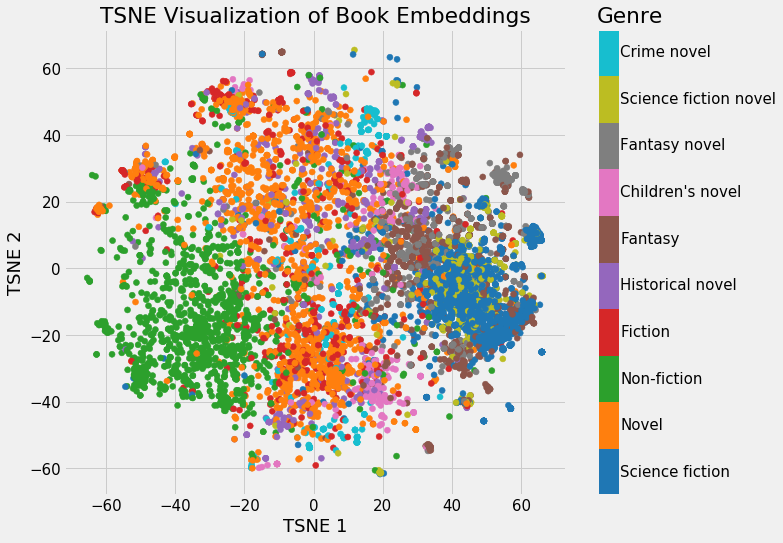

In [152]:
from bigframes.ml.cluster import KMeans
cluster_model = KMeans(n_clusters=5) 

In [153]:
cluster_model.fit(predicted_embeddings[["text_embedding"]])
clustered_result = cluster_model.predict(predicted_embeddings)
clustered_result.head(n=5)

CENTROID_ID                         NEAREST_CENTROIDS_DISTANCE  \
0            4  [{'CENTROID_ID': 4, 'DISTANCE': 0.580533718778...   
1            2  [{'CENTROID_ID': 2, 'DISTANCE': 0.585967844138...   
2            4  [{'CENTROID_ID': 4, 'DISTANCE': 0.448191129262...   
3            1  [{'CENTROID_ID': 1, 'DISTANCE': 0.582163756452...   
4            1  [{'CENTROID_ID': 1, 'DISTANCE': 0.608470517557...   

                                      text_embedding  \
0  [0.044397640973329544, -0.05564365163445473, -...   
1  [-0.006420280784368515, -0.011484960094094276,...   
2  [0.06935514509677887, -0.04410707205533981, 0....   
3  [0.07226213812828064, -0.03304576501250267, -0...   
4  [0.031345196068286896, -0.022827615961432457, ...   

                             statistics ml_embed_text_status  \
0  {"token_count":53,"truncated":false}                        
1  {"token_count":50,"truncated":false}                        
2  {"token_count":47,"truncated":false}                        
3  {"token_count":37,"truncated":false}                        
4  {"token_count":45,"truncated":false}                        

                                             content  
0  His annual Christmas party faltering thanks to...  
1  Timmy Turner been going overboard with his wis...  
2  When a successful woman returns to her hometow...  
3  Prodigal daughter Tumi goes home for the holid...  
4  As Christina prepares her restaurant for its b...  

[5 rows x 6 columns]

Lets pick five examples from each cluster

In [154]:
cluster_1_result = clustered_result[clustered_result["CENTROID_ID"] == 1][["content"]]
cluster_1_result_pandas = cluster_1_result.head(5).to_pandas()

cluster_2_result = clustered_result[clustered_result["CENTROID_ID"] == 2][["content"]]
cluster_2_result_pandas = cluster_2_result.head(5).to_pandas()

cluster_3_result = clustered_result[clustered_result["CENTROID_ID"] == 3][["content"]]
cluster_3_result_pandas = cluster_3_result.head(5).to_pandas()

cluster_4_result = clustered_result[clustered_result["CENTROID_ID"] == 4][["content"]]
cluster_4_result_pandas = cluster_4_result.head(5).to_pandas()

cluster_5_result = clustered_result[clustered_result["CENTROID_ID"] == 5][["content"]]
cluster_5_result_pandas = cluster_5_result.head(5).to_pandas()

In [49]:
prompts_list = []
prompt1 = 'movies description 1:\n'
for i in range(5):
    prompt1 += str(i + 1) + '. ' + \
        cluster_1_result_pandas["content"].iloc[i] + '\n'
prompts_list.append(prompt1)

prompt2 = 'movies description 2:\n'
for i in range(5):
    prompt2 += str(i + 1) + '. ' + \
        cluster_2_result_pandas["content"].iloc[i] + '\n'
prompts_list.append(prompt2)
    
    
prompt3 ='movies description 3:\n'
for i in range(5):
    prompt3 += str(i + 1) + '. ' + \
        cluster_3_result_pandas["content"].iloc[i] + '\n'
prompts_list.append(prompt3)
    
    
prompt4 = 'movies description 4:\n'
for i in range(5):
    prompt4 += str(i + 1) + '. ' + \
        cluster_4_result_pandas["content"].iloc[i] + '\n'    
prompts_list.append(prompt4)

prompt5 = 'movies description 5:\n'
for i in range(5):
    prompt5 += str(i + 1) + '. ' + \
        cluster_5_result_pandas["content"].iloc[i] + '\n'    
prompts_list.append(prompt5)    

In [155]:
prompts_list

["movies description 1:\n1. Prodigal daughter Tumi goes home for the holidays and manages to ruin her sister's wedding plans. Now she must make things right before it's too late.\n2. As Christina prepares her restaurant for its busiest time of year, she gets her DNA test revealing that she's Jewish. The discovery leads her to a new family and an unlikely romance over eight nights.\n3. On Christmas Day, Georgia experiences the true ups and downs of the holiday season. Through empathy and active listening, she does her best to understand the situations surrounding her to help make the season brighter.\n4. Two college sweethearts reconnect while coordinating a wedding just in time for the holidays.\n5. Hotel manager Willow returns to her stunning Virginia hometown to help her sister plan a Christmas wedding at the inn her family once owned. She must work with current owner and single dad David, who wants to let go of the past.\n",
 "movies description 2:\n1. Timmy Turner been going overbo

In [156]:
from bigframes.ml.llm import PaLM2TextGenerator

llm_model = PaLM2TextGenerator()
for i in range(5):
    prompt = "Next, there is the description of some related Christmas movies, extract the key topic present on all of them within the overall Chrismas theme, only one topic, return in JSON format" + prompts_list[i-1]
    bdf = bpd.DataFrame({"prompt": [prompt]})
    topics = llm_model.predict(bdf)
    print(topics["ml_generate_text_llm_result"].iloc[0])

 ```json
{
  "key_topic": "Love and relationships"
}
```


 ```json
{
  "key_topic": "Family and relationships"
}
```


 ```json
{
  "key_topic": "Christmas miracles"
}
```


 ```json
{
  "key_topic": "Redemption and kindness during the Christmas season"
}
```


 ```json
{
  "key_topic": "Love and relationships during Christmas"
}
```


### Building data apps

Remember, `bigframes` is **just** a python, you can embed it anywhere you want

In [157]:
import gradio as gr
import bigframes.pandas as bpd

def filter_records(records, movie_type):
    return records[records["type"] == movie_type]


demo = gr.Interface(
    filter_records,
    [
        gr.Dataframe(
            bpd.read_gbq("velascoluis-dev-sandbox.xmas_dataset.xmas_movies_table").to_pandas(),
        ),
        gr.Dropdown(["Movie", "TV Episode"]),
    ],
    "dataframe",
    description="Enter type.",
)

if __name__ == "__main__":
    demo.launch(show_api=False,share=True)   

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://86b0703e4979bd3ae9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Its a wrap! 🌯